<div class="alert alert-info">
<font size="5"><b><font size="5"><b>Изучение заведений общественного питания Москвы
</b></font>

- Автор: Плохотнюк С.А.
- Дата: 31.12.2024

### Цели и задачи проекта

<font color='#777778'>Исследовательский анализ рынка Москвы, а именно заведений общественного питания в Москве, с целью разработки стратегии выбора подходящего инвесторам места.</font>

### Описание данных

<font color='#777778'>Файл /datasets/rest_info.csv содержит информацию о заведениях общественного питания:

    name — название заведения;
    address — адрес заведения;
    district — административный район, в котором находится заведение, например Центральный административный округ;
    category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
    hours — информация о днях и часах работы;
    rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
    chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
      
        0 — заведение не является сетевым;
        1 — заведение является сетевым.
    seats — количество посадочных мест.

Файл /datasets/rest_price.csv содержит информацию о среднем чеке в заведениях общественного питания:

    price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
    avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
      
        «Средний счёт: 1000–1500 ₽»;
        «Цена чашки капучино: 130–220 ₽»;
        «Цена бокала пива: 400–600 ₽».
        и так далее;
    middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
      
        Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
        Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
        Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
    middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
      
        Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
        Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
        Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт..</font>

### Содержимое проекта

<font color='#777778'>
1.Загрузка данных о заведениях общественного питания Москвы. Объединение в один датасет.
2. Знакомство с данными о заведениях общественного питания Москвы, изучение общей информации о них. Предобработка данных.
3. Обработка статистических данных. Анализ распределения объектов общественного питания в целом по Москве, в том числе отдельно в Центральном округе. Корреляция рейтинга объекта от других параметров, представленных в датасепте. 
4. Вывод по результатам проведенного анализа. Рекомендации для бизнеса.


</font>

---

## 1. Загрузка данных и знакомство с ними

- Загрузите данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

In [1]:
# Импортируем библиотеки
import pandas as pd
# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
# Загружаем библиотеки для визуализации данных
import seaborn as sns

!pip install scipy

import scipy.stats

# Проверяем наличие библиотеки phik
try:
    from phik import phik_matrix  # Добавлено для импорта функции phik_matrix
except ModuleNotFoundError:
    print("Библиотека 'phik' не найдена. Убедитесь, что она установлена.")
    # Установка библиотеки phik
    !pip install phik
    # Рекомендуется перезапустить ядро после установки


- Познакомьтесь с данными и изучите общую информацию о них.

In [2]:
rest_info = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')

In [3]:
rest_price = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

In [4]:
rest_info.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [5]:
rest_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [6]:
rest_price.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [7]:
rest_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


In [8]:
# Находим уникальные значения в столбце 'name'
unique_name = rest_info['name'].unique()
print("Уникальные категории:", unique_name)

Уникальные категории: ['WoWфли' 'Четыре комнаты' 'Хазри' ... 'Миславнес' 'Самовар' 'Kebab Time']


In [9]:
# Находим уникальные значения в столбце 'category'
unique_categories = rest_info['category'].unique()
print("Уникальные категории:", unique_categories)

Уникальные категории: ['кафе' 'ресторан' 'кофейня' 'пиццерия' 'бар,паб' 'быстрое питание'
 'булочная' 'столовая']


In [10]:
# Находим уникальные значения в столбце 'district'
unique_district = rest_info['district'].unique()
print("Уникальные категории:", unique_district)

Уникальные категории: ['Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Западный административный округ' 'Центральный административный округ'
 'Восточный административный округ' 'Юго-Восточный административный округ'
 'Южный административный округ' 'Юго-Западный административный округ']


In [11]:
# Находим уникальные значения в столбце 'chain'
unique_chain = rest_info['chain'].unique()
print("Уникальные категории:", unique_chain)

Уникальные категории: [0 1]


Анализ уникальных значений в столбцах name, category, district,chain показал, что дублей по данных столбцам нет. Здесь все хорошо.

### Подготовка единого датафрейма

- Объедините данные двух датасетов в один, с которым вы и продолжите работу.

In [12]:
# Соединяем данные в единый датафрейм df
df = rest_info.merge(rest_price, how= 'left', on = 'id')

In [13]:
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


### Промежуточный вывод

датасет df содержит 13 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания. Объем данных 919.4+ КВ.

Столбцы rating, chain, seats, middle_avg_bill, float64, middle_coffee_cup представлены числовыми данными. Столбец chain имеет смысл привести к меньшему разряду для уменьшения объема памяти.
Столбцы с вещественными данными представлены типом данных объект.

## 2. Предобработка данных

Подготовьте данные к исследовательскому анализу:

- Изучите корректность типов данных и при необходимости проведите их преобразование.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


В датасепте 4 колонки с типом данных float64, 1 колонка с типом данных int64, 8 с типом данных object.
Целесообразно оптимизировать тип данных в столбце chain на целочисленный тип с меньшей разрядностью

In [16]:
# Оптимизируем целочисленный тип данных в датафрейме chain
df['chain'] = pd.to_numeric(df['chain'], downcast='integer') 

In [17]:
#Проверим изменение типа данных
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int8   
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int8(1), object(8)
memory usage: 861.9+ KB


тип данных в Столбце chain изменился до int8, что сохраняет память. Объем данных уменьшен до 861,9+ КВ.  

In [18]:
# Выводим названия столбцов датафрейма info_df
df.columns

Index(['id', 'name', 'category', 'address', 'district', 'hours', 'rating',
       'chain', 'seats', 'price', 'avg_bill', 'middle_avg_bill',
       'middle_coffee_cup'],
      dtype='object')

Отлично. Названия столбцов единны. Но для возможных отклонений, преобразцем названия столбцов в snake_case

In [19]:
# Названия столбцов лучше привести к одному виду, например snake case.
# Напишем функцию для корректировки названия столбцов из CamelCase в snake_case
def col_to_snake_case(df):
    for col in df.columns:
        str_bad = col
        if str_bad[0].isupper():
            str_bad = str_bad[0].lower() + str_bad[1:]
        for index_s, item_s in enumerate(str_bad):
            if item_s.isupper():
                str_bad = str_bad[:index_s] + '_' + str_bad[index_s].lower() + str_bad[index_s + 1:]
        df = df.rename(columns={col: str_bad})
    return df 
# Применяем функцию col_to_snake_case()
df = col_to_snake_case(df)

In [20]:
# Проверяем названия столбцов датафрейма df
df.columns

Index(['id', 'name', 'category', 'address', 'district', 'hours', 'rating',
       'chain', 'seats', 'price', 'avg_bill', 'middle_avg_bill',
       'middle_coffee_cup'],
      dtype='object')

- Изучите пропущенные значения в данных: посчитайте их количество в каждом столбце датафрейме, изучите данные с пропущенными значениями и предположите гипотезы их появления. Проведите обработку пропущенных значений: вы можете заменить пропуски на определённое значение, удалить строки с пропусками или оставить их как есть.

In [21]:
# Применяем метод isna() к датафрейму df
df.isna().sum().sort_values(ascending=False)

middle_coffee_cup    7871
middle_avg_bill      5257
price                5091
avg_bill             4590
seats                3611
hours                 536
id                      0
name                    0
category                0
address                 0
district                0
rating                  0
chain                   0
dtype: int64

In [22]:
# Вычисляем процент пропущенных значений
missing = (df.isna().sum() / df.shape[0]).sort_values(ascending=False)

# Преобразуем Series в DataFrame
missing_df = missing.to_frame(name='Missing')

# Применяем градиентный фон к результатам
styled_output = missing_df.style.background_gradient(cmap='coolwarm', axis=0).set_precision(2)

styled_output

,Missing
middle_coffee_cup,0.94
middle_avg_bill,0.63
price,0.61
avg_bill,0.55
seats,0.43
hours,0.06
id,0.00
name,0.00
category,0.00
address,0.00


Выявлены пропуски в столбцах:
Максимально в middle_coffee_cup    0.94,
далее
middle_avg_bill 	0.63
price 	0.61
avg_bill 	0.55
seats 	0.31
hours 	0.06

In [23]:
#Чтобы разобраться с причиной пропусков, проанализируем возможные взаимосвязи пропусков 
#Определяем функцию, которая создаст новый столбец с бинарным признаком в зависимости от наличия данных в другом столбце
def middle_is_na(x):
    if x:
        return 0
    return 1 

In [24]:
# Создаём столбец is_middle с помощью функции middle_is_na
df['is_middle'] = df['middle_avg_bill'].isna().apply(middle_is_na) 

In [25]:
# Проводим агрегацию данных по полю 'is_middle
df.groupby('is_middle').agg({
    'seats':'mean',
    'chain':'mean'
}) 

,seats,chain
is_middle,,
0,104.906239,0.384059
1,113.376884,0.376628


In [26]:
# Создаём столбец is_middle_coffee с помощью функции middle_is_na
df['is_middle_coffee'] = df['middle_coffee_cup'].isna().apply(middle_is_na) 

In [27]:
# Проводим агрегацию данных по полю 'is_middle
df.groupby('is_middle_coffee').agg({
    'seats':'mean',
    'chain':'mean'
}) 

,seats,chain
is_middle_coffee,,
0,108.804715,0.373777
1,102.662207,0.491589


Пропуски в столбце "число с оценкой среднего чека" и "число с оценкой одной чашки капучино" практически в равном процентном соотношении, как в сетевых, так и в не сетевых учреждениях. Они практически не связаны с наличием или отсутствием сведений по числу мест в заведении.
Вероятно, эти пропуски обусловлены тем, что значений нет в столбце avg_bill (в 6 процентах случаев) или оно не начинается с подстроки «Средний счёт».

- Проверьте данные на явные и неявные дубликаты, например поля с названием и адресом заведения. Для оптимизации проверки нормализуйте данные в текстовых столбцах, например с названием заведения.

In [28]:
df['name'] = df['name'].str.lower().str.replace(' ', '')

In [29]:
# Проверяем полные дубликаты в датафрейме info_df
df.duplicated().sum() 

0

In [30]:
# Проверяем неявные дубликаты в датафрейме clients_df
df.duplicated(subset=['name', 'address', 'district']).sum() 

4

In [31]:
# Проверяем неявные дубликаты в датафрейме clients_df
duplicates = df[df.duplicated(subset=['name', 'address', 'district'], keep=False)]
display(duplicates)


,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_middle,is_middle_coffee
1430,62608690e9cc464fbcd980cfd552e334,morepoke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",4.2,0,188.0,NaN,NaN,NaN,NaN,0,0
1511,a69f018d5c064873a3b491b0121bc1b4,morepoke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188.0,NaN,NaN,NaN,NaN,0,0
2211,c6ef39ae8a8c483d8f9a6531bc386a2c,раковарняклешниихвосты,ресторан,"Москва, проспект Мира, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",4.4,0,150.0,NaN,NaN,NaN,NaN,0,0
2420,aba1de7ad7d64ac0a3f8684bda29d905,раковарняклешниихвосты,"бар,паб","Москва, проспект Мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150.0,NaN,NaN,NaN,NaN,0,0
3091,3c2a73ea79a04be48858fab3685f2f37,хлебдавыпечка,булочная,"Москва, Ярцевская улица, 19",Западный административный округ,"ежедневно, 09:00–22:00",4.1,1,276.0,NaN,NaN,NaN,NaN,0,0
3109,d3116844e4e048f99614eb30be3214e0,хлебдавыпечка,кафе,"Москва, Ярцевская улица, 19",Западный административный округ,NaN,4.1,0,276.0,NaN,NaN,NaN,NaN,0,0
4613,c604c846b838480e9ba47a404ba200f9,cafe13,кафе,"Москва, Мясницкая улица, 13, стр. 11",Центральный административный округ,пн-чт 10:00–22:00; пт 10:00–19:00,4.3,0,200.0,NaN,NaN,NaN,NaN,0,0
4780,bfb96e4f7b4d4f6d94e94b0187527a42,cafe13,ресторан,"Москва, Мясницкая улица, 13, стр. 11",Центральный административный округ,пн-чт 10:00–22:00; пт 10:00–18:00,4.3,0,200.0,NaN,NaN,NaN,NaN,0,0


In [32]:
# Удаляем дубликаты по столбцам 'name', 'address' и 'district'
df = df.drop_duplicates(subset=['name', 'address', 'district'])
# Проверяем неявные дубликаты в датафрейме clients_df
df.duplicated(subset=['name', 'address', 'district']).sum() 

0

В датафреймах нет полных дубликатов строк. 
Есть 4 неявных дубликата (morepoke  ресторан, раковарняклешниихвосты  ресторан и бар,паб, хлебдавыпечка булочная и кафе, cafe13 кафе и  ресторан.
Дубликаты удалены.

- Для дальнейшей работы создайте столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [33]:
# Проверка на наличие обоих слов
contains_daily = df['hours'].str.contains('ежедневно', na=False)
contains_24_7 = df['hours'].str.contains('круглосуточно', na=False)

# Объединение условий
df['is_24_7'] = contains_daily & contains_24_7
df.groupby('is_24_7').nunique() 

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_middle,is_middle_coffee
is_24_7,,,,,,,,,,,,,,,
False,7672,5099,8,5267,9,1304,41,2,228,4,863,225,95,2,2
True,730,495,8,666,9,1,34,2,107,4,138,59,9,2,2


In [34]:
df.groupby('category')['name'].nunique() 

category
бар,паб             679
булочная            138
быстрое питание     441
кафе               1739
кофейня             822
пиццерия            360
ресторан           1530
столовая            242
Name: name, dtype: int64

---

### Промежуточный вывод

После предобработки данных напишите промежуточный вывод о проведённой работе. Отразите количество или долю отфильтрованных данных, если вы что-то удаляли.

После предобработки данных напишите промежуточный вывод о проведённой работе. Отразите количество или долю отфильтрованных данных, если вы что-то удаляли.

Предствленный датасет df содержит 13 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания. Объем данных 919.4+ КВ.
Столбец chain: изменен тип данных до int8. После преобразования: В датасепте 4 колонки с типом данных float64, 1 колонка с типом данных int8, 8 с типом данных object. Объем данных уменьшен до 861,9+ КВ.

Столбцы rating, chain, seats, middle_avg_bill, float64,middle_coffee_cup представлены числовыми данными. 
Столбцы с вещественными данными представлены типом данных объект.

Все наименования столбцов в единном образце. Представлены типом данных 'object.

Выявлены пропуски в столбцах: Максимально в middle_coffee_cup 0.94, далее middle_avg_bill 0.63 price 0.61 avg_bill 0.55 seats 0.31 hours 0.06
Кроме hours во всех столбцах огромное количество пропусков. 
Все пропуски оставлены в неизменном виде, так как могут искажать результат.
ропуски в столбце "число с оценкой среднего чека" и "число с оценкой одной чашки капучино" практически в равном процентном соотношении, как в сетевых, так и в не сетевых учреждениях. Они практически не связаны с наличием или отсутствием сведений по числу мест в заведении. Вероятно, эти пропуски обусловлены тем, что значений нет в столбце avg_bill (в 6 процентах случаев) или оно не начинается с подстроки «Средний счёт».

В датафреймах нет полных дубликатов строк.
Есть 4 неявных дубликата (morepoke  ресторан, раковарняклешниихвосты  ресторан и бар,паб, хлебдавыпечка булочная и кафе, cafe13 кафе и  ресторан.Дубликаты удалены.

730 учрежденийв г.Москва работают круглосуточно и в ежедневном режиме.

## 3. Исследовательский анализ данных
Проведите исследовательский анализ исходных данных.

При исследовании данных используйте визуализации. Проверьте, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставляйте небольшой комментарий с выводом или обсуждением результата. В конце шага обобщите результаты, выделив, по вашему мнению, самые важные.

---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

In [35]:
# Проверяем уникальные значения в столбцe category
for column_category in ['category']:
    print(f'Уникальные значения в столбце {column_category}:')
    print(df[column_category].sort_values().unique())

Уникальные значения в столбце category:
['бар,паб' 'булочная' 'быстрое питание' 'кафе' 'кофейня' 'пиццерия'
 'ресторан' 'столовая']


In [36]:
#Проверяем распределение данных по значениям столбца category
print('Распределение данных по значениям столбца category:')
df['category'].value_counts() 

Распределение данных по значениям столбца category:


кафе               2377
ресторан           2041
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

об этим данным можно сделать вывод, что все количество объектов общественного питания по каждой категории разные. Максимальное количество объектов в категории кафе (2377), ресторан (2041), кофейня (1413). В меньше количестве бар,паб (764), пиццерия (633), быстрое питание (603). Столовая и булочная количество объектов небольшое: 315 и 256 соответственно.

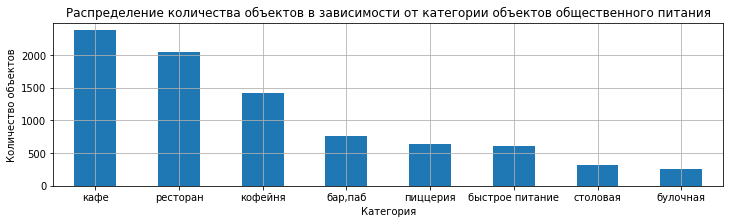

In [37]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 3))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['category'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение количества объектов в зависимости от категории объектов общественного питания'
)

# Настраиваем оформление графика
plt.xlabel('Категория')
plt.ylabel('Количество объектов')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show() 

Из категорий по количеству объектов три (кафе, ресторан, кофейня) значительно преобладают, что отображено на столбчатой диаграмме "Распределение количества объектов в зависимости от категории объектов общественного питания".

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

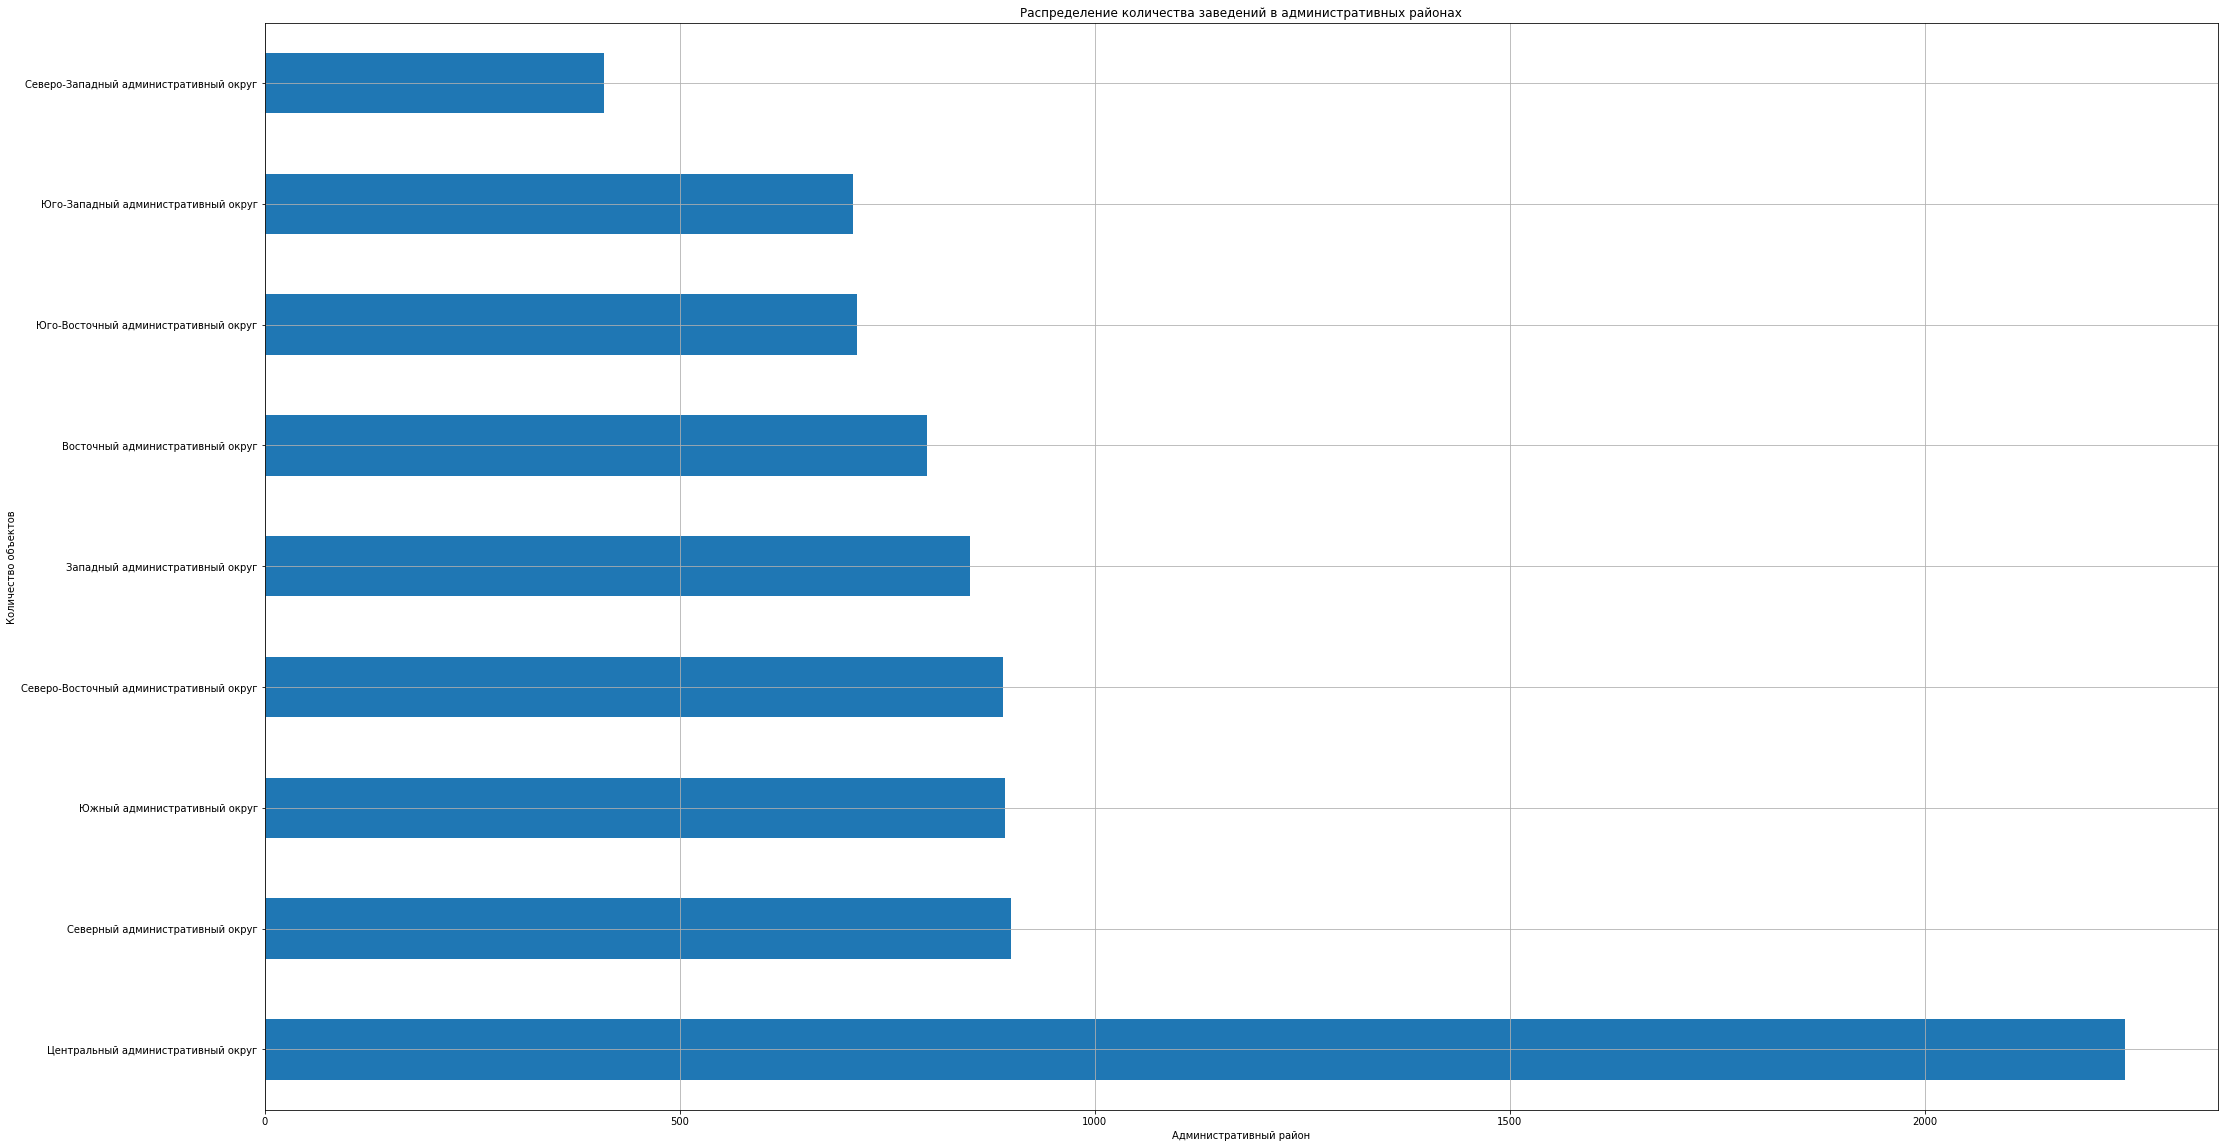

In [38]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(35, 20))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['district'].value_counts().plot(
               kind='barh', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение количества заведений в административных районах'
)

# Настраиваем оформление графика
plt.xlabel('Административный район')
plt.ylabel('Количество объектов')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show() 

При визуализации отчетливо видно, что по количеству заведений лидирует Центральный административный округ. Остальные районы по числу заведений на одном уровне. Минимальное количество в Северо-Западном административом округе

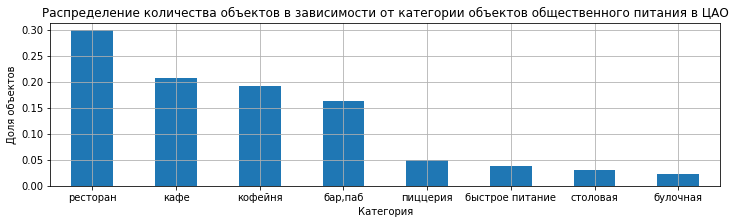

In [39]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 3))

# Данные для ЦАО
cao_data = df.loc[df['district'] == 'Центральный административный округ']['category'].value_counts()
cao_total = cao_data.sum()  # Общее количество объектов в ЦАО
cao_normalized = cao_data / cao_total  # Нормализация

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
cao_normalized.plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение количества объектов в зависимости от категории объектов общественного питания в ЦАО'
)

# Настраиваем оформление графика
plt.xlabel('Категория')
plt.ylabel('Доля объектов')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show() 

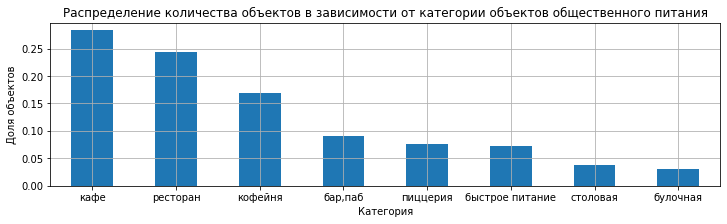

In [40]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 3))

# Данные для всей Москвы
moscow_data = df['category'].value_counts()
moscow_total = moscow_data.sum()  # Общее количество объектов в Москве
moscow_normalized = moscow_data / moscow_total  # Нормализация

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
moscow_normalized.plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение количества объектов в зависимости от категории объектов общественного питания'
)

# Настраиваем оформление графика
plt.xlabel('Категория')
plt.ylabel('Доля объектов')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show() 

При визуализации отчетливо видно, что в Центральном административном округе основная доля приходится на  рестораны (30%), далее кафе (21%) и кофейни(19). На четвертом месте бар, паб 16 %. 5% прихолится на пиццерию, менее 5% - быстрое питание, столовые, булочные.

В москве структура меняяется. Основная доля приходится на кафе (29%). Рестораны ушли на второе место и занимают 24% в сравнении в ЦАО,где 30 % приходится на рестораны. На третьем месте кофейни (17%). Чуть меньше  бар, паб (9%). Малое количество приходится пицеерии и бысторе питание по 5%, менее 5% столовые и булочные

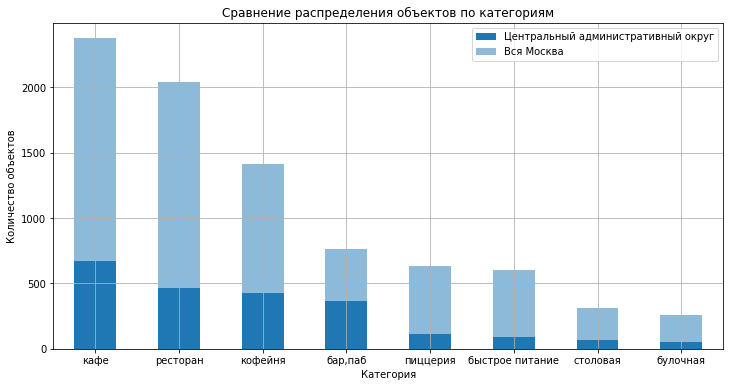

In [41]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 6))

# Строим столбчатую диаграмму для Центрального административного округа
df.loc[df['district'] == 'Центральный административный округ']['category'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title='Сравнение распределения объектов по категориям'
)

# Строим столбчатую диаграмму для всей Москвы
df['category'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               alpha=0.5, # Прозрачность для лучшего сравнения
               legend=False # Выключаем легенду
)

# Настраиваем оформление графика
plt.xlabel('Категория')
plt.ylabel('Количество объектов')
plt.grid()

# Добавляем легенду для различения
plt.legend(['Центральный административный округ', 'Вся Москва'])

# Выводим график
plt.show()

Анализ объектов общественного питания показывает, что распределение ресторанов, кофейн, кафе в процентном соотношении в Центральном округе соизмеримо с распределением по всей Москве.
А в категоричх бар, паб, пиццерия, ысторое питание, столовая, булочная представлено в Централном округе в меньшем количестве. 
Возможно, данные заведения менее востребованы в Центральном округе.


---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

In [42]:
# Посчитаем количество уникальных клиентов для каждого значения столбца chain
print('Количество учреждений:')
df.groupby('chain')['name'].nunique() 

Количество учреждений:


chain
0    4792
1     744
Name: name, dtype: int64

Несетевых заведений 4793 объекта. Сетевых заведений 744 объекта. 

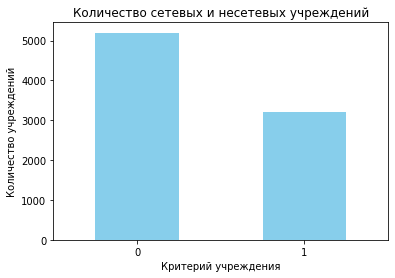

In [43]:
df['chain'].value_counts().plot(kind='bar',
				title='Количество сетевых и несетевых учреждений',
                legend=False,
                ylabel='Количество учреждений',
                xlabel='Критерий учреждения',
				rot=0,
                color='skyblue')
plt.show()

Визуализация наглядно показывает лидируещую позицию несетевых заведений

In [44]:
# Создаём сводную таблицу с мультииндексами
pivot_chain = pd.pivot_table(
    df,
    index=['chain', 'category'],
    values='name',
    aggfunc='count'
)

print(pivot_chain)

                       name
chain category             
0     бар,паб           596
      булочная           99
      быстрое питание   371
      кафе             1598
      кофейня           693
      пиццерия          303
      ресторан         1312
      столовая          227
1     бар,паб           168
      булочная          157
      быстрое питание   232
      кафе              779
      кофейня           720
      пиццерия          330
      ресторан          729
      столовая           88


Анализ показывает, что среди несетевых учреждений на первом месте находится кафе - 1598, на втором - ресторан (1312), на третьем кофейня, однако, в два раза меньше, чем кафе и ресторан, и насчитывает 693 объекта. Среди сетевых на первом месте кафе (779 объектов) и чуть меньше ресторан(729 объектов) и кофейня (720 объектов). На втором месте пиццерия - 330 объектов.

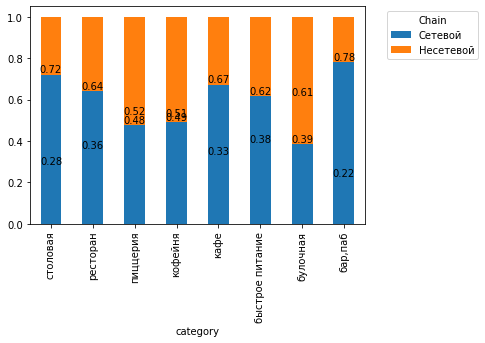

In [45]:
# Создаём таблицу, которая группирует данные по 'chain', 'category'
df_unstack = df.groupby('category')['chain'].value_counts(normalize=True).unstack(fill_value=0).sort_values(by='category', ascending=False)

# Строим столбчатую диаграмму
ax = df_unstack.plot(kind='bar', 
                     stacked=True)

# Добавляем значения на график
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

# Настраиваем легенду
ax.legend(title='Chain', 
          labels=['Сетевой', 'Несетевой'], 
          bbox_to_anchor=(1.05, 1), 
          loc='upper left')

# Отображаем график
plt.show()


In [46]:
df['chain'].value_counts()

0    5199
1    3203
Name: chain, dtype: int64

In [47]:
df['chain'].value_counts(normalize=True)

0    0.618781
1    0.381219
Name: chain, dtype: float64


Факторный анализ показывает, что 5199 учреэждений не является сетевыми(62%) и только 3203  (38 %)являются сетевыми. 

Анализ диаграммы показывает, что в объектах, имеющих статус "столовая", "кафе", "ресторан", "быстрое питание", "бар, паб" лидируют сетевые объекты. А в таких объектах, как "булочная", наоборот лидируещее место занимают не сетевые объекты общественного питания. В объектах "кофейня", "пиццерия" сетевые и несетые объекты представлены практически на одном уровне.


---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


In [48]:
# Изучаем статистические показатели столбца seats
print('Статистические показатели столбца seats:')
df['seats'].describe()

Статистические показатели столбца seats:


count    4791.000000
mean      108.342308
std       122.846815
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

Можно предположить, что данные столбца "число посадочных мест" имеют распределение, близкое к нормальному. Об этом говорит относительная близость среднего и медианного значений. 
Однако значение стандартного отклонения выше среднего — 122,85, при среднем 108,34,  что указывает, что данные могут иметь незначительный разброс. Разница между минимальным и максимальным значениями это подтверждает.

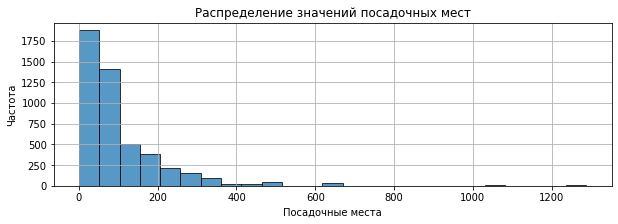

In [49]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df['seats'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=25, # Устанавливаем количество корзин - всего 25
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение значений посадочных мест')
plt.xlabel('Посадочные места')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show() 

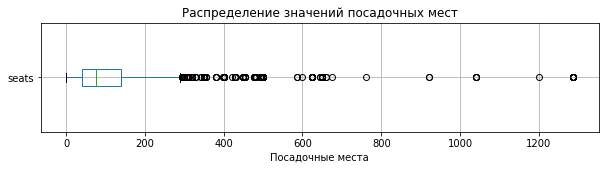

In [50]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 2))

# Строим диаграмму размаха значений в столбце seats
df.boxplot(column='seats', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений посадочных мест')
plt.xlabel('Посадочные места')

# Выводим график
plt.show() 

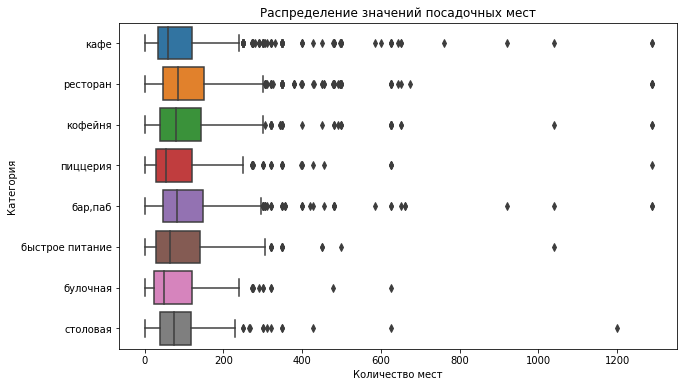

In [51]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 6))

# Строим диаграмму размаха значений в столбце seats
sns.boxplot(x='seats', y='category',data = df, orient = 'h')

# Добавляем заголовок и метки оси
plt.title('Распределение значений посадочных мест')
plt.ylabel('Категория')
plt.xlabel('Количество мест')

# Выводим график
plt.show() 

В столбце количество посадочных мест без разделения на категории отмечаются выбросы свыше 300, что нужно учитывать при проведении математических вычислений.
При разбивке посадочных мест по категориям при анализе диаграммы размаха выбросы отмечаются по всем категориям объектов. Минимальное количество в объектах категории быстрое питание.

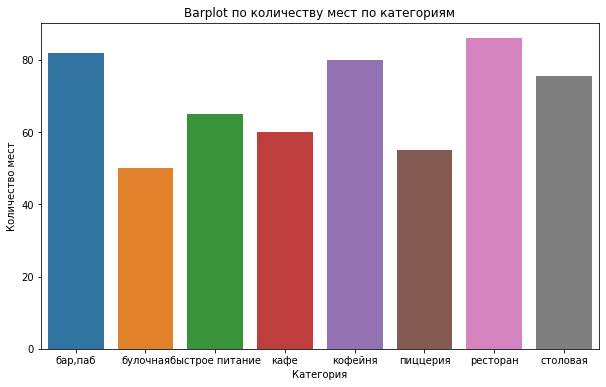

In [52]:
plt.figure(figsize=(10, 6))

# Группировка данных по категориям и суммирование мест
grouped_data = df.groupby('category')['seats'].median().reset_index()


# Построение barplot
sns.barplot(x='category', y='seats', data=grouped_data)
plt.title('Barplot по количеству мест по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество мест')
plt.show()

In [53]:
pivot_sales = pd.pivot_table(
    df,
    index='category',
    values='seats',
    aggfunc= 'mean' # Применяем несколько функций агрегации: суммирование и среднее значение
)

print(pivot_sales)

                      seats
category                   
бар,паб          124.477516
булочная          89.385135
быстрое питание   98.891117
кафе              97.365653
кофейня          111.199734
пиццерия          94.496487
ресторан         121.830442
столовая          99.750000


Самое большое количество (более 80) посадочных мест отмечается в ресторанах, кофейнях, булочных. Минимальное около 50 в пиццерии.

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

          category    rating
0          бар,паб  4.387696
1         булочная  4.268359
2  быстрое питание  4.050249
3             кафе  4.123896
4          кофейня  4.277282
5         пиццерия  4.301264
6         ресторан  4.290397
7         столовая  4.211429


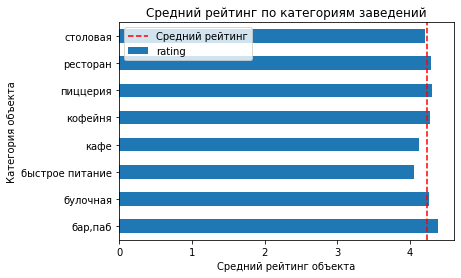

In [54]:
# Вычисляем средние рейтинги по категориям
average_ratings = df.groupby('category')['rating'].mean().reset_index()

# Создаем таблицу с средними рейтингами
print(average_ratings)  # Выводим таблицу на экран

# Строим линейчатую диаграмму
average_ratings.plot.barh(x='category', y='rating', legend=False)

# Добавляем средний рейтинг по всем категориям
average_rating_mean = df['rating'].mean()
plt.axvline(average_rating_mean, color='red', linestyle='--', label='Средний рейтинг')

# Добавляем подписи к осям и заголовок
plt.ylabel('Категория объекта')
plt.xlabel('Средний рейтинг объекта')
plt.title('Средний рейтинг по категориям заведений')

plt.legend()  # Добавляем легенду для обозначения средней линии

# Показываем график
plt.show()


Средний рейтинг отдельно взятой категории соответствует среднему рейтингу по всем категориям по следующим категориям: столовая,булочная. Чуть выше среднего рейтинг у учреждений в категории ресторан, пиццерия, булочная. Объекты в категории бар, паб имеет рейнинг самый высокий по сравнению со средним рейтингом по всем категориям заведений общественного питания.

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

In [55]:
 # Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix2 = df[['rating', 'category', 'district', 'chain', 'seats', 'price', 'is_24_7']].phik_matrix()

# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k для переменной rating')
correlation_matrix2.loc[correlation_matrix2.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['rating', 'chain', 'seats']
Корреляционная матрица с коэффициентом phi_k для переменной rating


,rating
price,0.220295
district,0.200671
category,0.189866
is_24_7,0.150196
chain,0.108121
seats,0.000000


рейтинг абсолютно не зависит от количества посадочных мест.
 Максимальная корреллия рейтинга отмечается от  цены и в меньшей степени от округа, где расположен объект.

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [56]:
df.loc[df['chain'] == 1].groupby('name', as_index=False).agg({'id': 'count', 'category': pd.Series.mode, 'rating': 'mean'}).sort_values(by = 'id', ascending=False).head(15)

,name,id,category,rating
726,шоколадница,120,кофейня,4.177500
334,домино'спицца,76,пиццерия,4.169737
330,додопицца,74,пиццерия,4.286486
147,onepricecoffee,71,кофейня,4.064789
739,яндекславка,69,ресторан,3.872464
58,cofix,65,кофейня,4.075385
167,prime,50,ресторан,4.116000
662,хинкальная,44,кафе,4.322727
404,кофепорт,42,кофейня,4.147619
417,кулинарнаялавкабратьевкараваевых,39,кафе,4.394872


В топ 15 учреждений по рейтингу входят:
шоколадница 74 	кофейни, 
додопицца 72 пиццерии,
домино'спицца 71 пиццерия,
cofix 35 кофейн,
кулинарнаялавкабратьевкараваевых 31 кафе,
кофепорт 30 	кофейн,
prime 26 ресторанов,
теремок 23 	ресторана, 
хинкальная 23 ресторана,
му-му 19 кафе,
тануки 18 ресторанов,
кофемания 16 кофейн,
андерсон 15 кафе,
vasilchukíchaihona№1 15 ресторанов,
мскlounge 14 бар,паб

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


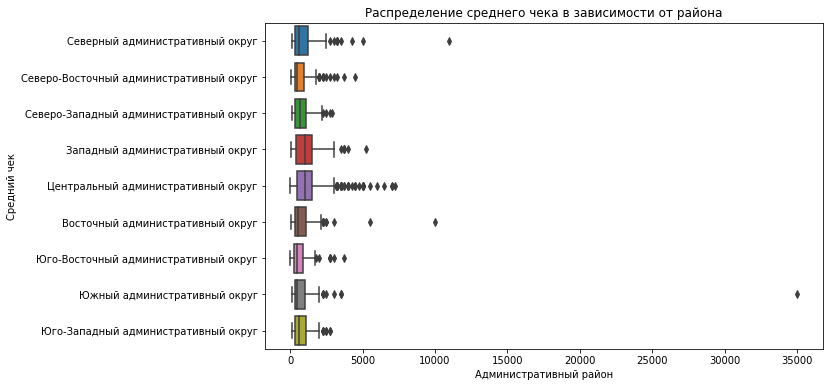

In [57]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 6))

# Строим диаграмму размаха значений в столбце middle_avg_bill
sns.boxplot(x='middle_avg_bill', y='district',data = df, orient = 'h')

# Добавляем заголовок и метки оси
plt.title('Распределение среднего чека в зависимости от района')
plt.ylabel('Средний чек')
plt.xlabel('Административный район')

# Выводим график
plt.show() 

Отмечаются выбросы, уберем их

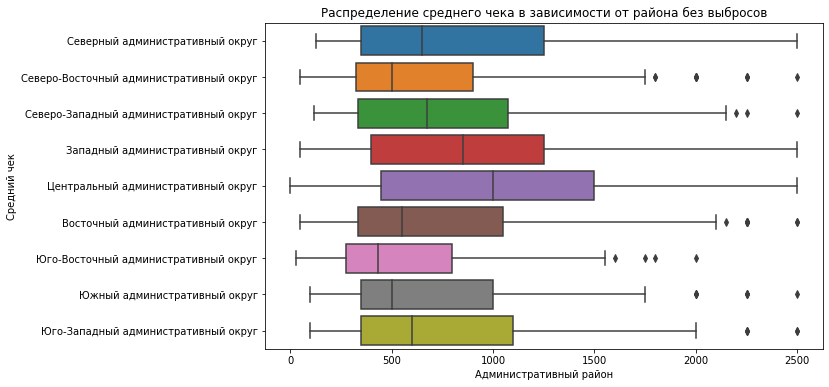

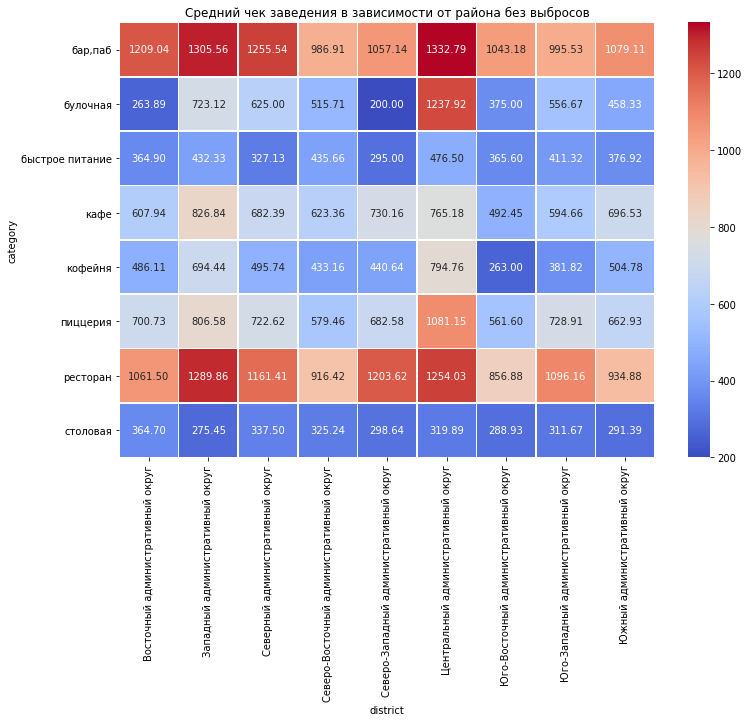

In [58]:
# Удаляем выбросы из столбца middle_avg_bill
Q1 = df['middle_avg_bill'].quantile(0.25)
Q3 = df['middle_avg_bill'].quantile(0.75)
IQR = Q3 - Q1
df_filtered = df[(df['middle_avg_bill'] >= (Q1 - 1.5 * IQR)) & (df['middle_avg_bill'] <= (Q3 + 1.5 * IQR))]

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 6))

# Строим диаграмму размаха значений в столбце middle_avg_bill без выбросов
sns.boxplot(x='middle_avg_bill', y='district', data=df_filtered, orient='h')

# Добавляем заголовок и метки оси
plt.title('Распределение среднего чека в зависимости от района без выбросов')
plt.ylabel('Средний чек')
plt.xlabel('Административный район')

# Выводим график
plt.show()

# Изменения для тепловой карты
plt.figure(figsize=(12, 8))  # размеры графика
# Посчитаем среднюю оценку банка в зависимости от количества используемых продуктов и лояльности клиентов без выбросов
middle_avg_bill_df = df_filtered.groupby(['category', 'district'])['middle_avg_bill'].mean().unstack(fill_value=0)

# Создаём визуализацию
sns.heatmap(data=middle_avg_bill_df, annot=True, fmt='.2f', linewidths=0.5, cmap='coolwarm')

# Показываем график с заголовком
plt.title('Средний чек заведения в зависимости от района без выбросов')
plt.show()

Самый высокий средний чек в ЦАО, больше 100 рублей. Далее в Западном округе более 800 рублей. 
Самый большой средний чек 1332,79 в пабе, баре в ЦАО и 1305 в в пабе, баре в Западном округе.
Далее 1289,86 в ресторане в Западном округе и 1254 в ресторане в ЦАО.

Самый маленький средеий чек в столовой, около 300 рублей по всем округам. Самые высие средние чеки в общем по округам в ресторанах и бае, пабе.

In [59]:
# Создаём таблицу район и средний чек
average_bill_table = df.groupby('district')['middle_avg_bill'].median().reset_index()
print(average_bill_table)


                                  district  middle_avg_bill
0         Восточный административный округ            575.0
1          Западный административный округ           1000.0
2          Северный административный округ            650.0
3  Северо-Восточный административный округ            500.0
4   Северо-Западный административный округ            700.0
5       Центральный административный округ           1000.0
6     Юго-Восточный административный округ            450.0
7      Юго-Западный административный округ            600.0
8             Южный административный округ            500.0


---

### Задача 9

 При необходимости проведите исследования других данных и их взаимосвязи. Например, часы работы заведений или стоимость чашки кофе в зависимости от расположения или типа заведения.


---

### Промежуточный вывод

Обобщите полученные результаты, выделив, по вашему мнению, самые важные.

После предобработки данных напишите промежуточный вывод о проведённой работе. Отразите количество или долю отфильтрованных данных, если вы что-то удаляли.

Предствленный датасет df содержит 13 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания. Объем данных 919.4+ КВ.
Столбец chain: изменен тип данных до int8. После преобразования: В датасепте 4 колонки с типом данных float64, 1 колонка с типом данных int8, 8 с типом данных object. Объем данных уменьшен до 861,9+ КВ.

Столбцы rating, chain, seats, middle_avg_bill, float64,middle_coffee_cup представлены числовыми данными. 
Столбцы с вещественными данными представлены типом данных объект.

Все наименования столбцов в единном образце. Представлены типом данных 'object.

Выявлены пропуски в столбцах: Максимально в middle_coffee_cup 0.94, далее middle_avg_bill 0.63 price 0.61 avg_bill 0.55 seats 0.31 hours 0.06
Кроме hours во всех столбцах огромное количество пропусков. 
Все пропуски оставлены в неизменном виде, так как могут искажать результат.
ропуски в столбце "число с оценкой среднего чека" и "число с оценкой одной чашки капучино" практически в равном процентном соотношении, как в сетевых, так и в не сетевых учреждениях. Они практически не связаны с наличием или отсутствием сведений по числу мест в заведении. Вероятно, эти пропуски обусловлены тем, что значений нет в столбце avg_bill (в 6 процентах случаев) или оно не начинается с подстроки «Средний счёт».

В датафреймах нет полных дубликатов строк.
Есть 4 неявных дубликата (morepoke  ресторан, раковарняклешниихвосты  ресторан и бар,паб, хлебдавыпечка булочная и кафе, cafe13 кафе и  ресторан.Дубликаты удалены.

Максимальное количество объектов отмечается в категории кафе (2378), ресторан (2043), кофейня (1413). В меньше количестве бар,паб (765), пиццерия (633), быстрое питание (603). 
Столовая и булочная количество объектов небольшое: 315 и 256 соответственно.

По количеству заведений лидирует Центральный административный округ. Остальные районы по числу заведений на одном уровне. Минимальное количество в Северо-Западном административом округе 

При визуализации отчетливо видно, что в Центральном административном округе основная доля приходится на  рестораны (30%), далее кафе (21%) и кофейни(19). На четвертом месте бар, паб 16 %. 5% прихолится на пиццерию, менее 5% - быстрое питание, столовые, булочные.

В москве структура меняяется. Основная доля приходится на кафе (29%). Рестораны ушли на второе место и занимают 24% в сравнении в ЦАО,где 30 % приходится на рестораны. На третьем месте кофейни (17%). Чуть меньше  бар, паб (9%). Малое количество приходится пицеерии и бысторе питание по 5%, менее 5% столовые и булочные/

Анализ показывает высокую корреляцию рейтинга объекта и графиком работы. Учреждения, работающие в ежедневном режиме и круглосуточно имеют более высокий рейтинг.

Факторный анализ показывает, что 5199 учреждений не является сетевыми(62%) и только 3203  (38 %)являются сетевыми.
Cреди несетевых учреждений на первом месте находится кафе - 1598, на втором - ресторан (1312), на третьем кофейня, однако, в два раза меньше, чем кафе и ресторан, и насчитывает 693 объекта. Среди сетевых на первом месте кафе (779 объектов) и чуть меньше ресторан(729 объектов) и кофейня (720 объектов). На втором месте пиццерия - 330 объектов.Анализ диаграммы показывает, что в объектах, имеющих статус "столовая", "кафе", "ресторан", "быстрое питание", "бар, паб" лидируют сетевые объекты. А в таких объектах, как "булочная", наоборот лидируещее место занимают не сетевые объекты общественного питания. В объектах "кофейня", "пиццерия" сетевые и несетые объекты представлены практически на одном уровне.

В столбце количество посадочных мест без разделения на категории отмечаются выбросы свыше 300. 
При разбивке посадочных мест по категориям при анализе диаграммы размаха выбросы отмечаются по всем категориям объектов. Минимальное количество в объектах категории быстрое питание.

Средний рейтинг отдельно взятой категории соответствует среднему рейтингу по всем категориям по следующим категориям: столовая,булочная. 
Чуть выше среднего рейтинг у учреждений в категории ресторан, пиццерия, булочная. Объекты в категории бар, паб имеет рейнинг самый высокий по сравнению со средним рейтингом по всем категориям заведений общественного питания.

Анализ показывает высокую корреляцию рейтинга объекта и графиком работы. 
Учреждения, работающие в ежедневном режиме  и круглосуточно имеют более высокий рейтинг.
На втором месте средняя корреляция между количеством посадочных мест и категорией объекта (сетевое, несетевое).

В топ 15 учреждений по рейтингу входят:
шоколадница 74 	кофейни, 
додопицца 72 пиццерии,
домино'спицца 71 пиццерия,
cofix 35 кофейн,
кулинарнаялавкабратьевкараваевых 31 кафе,
кофепорт 30 	кофейн,
prime 26 ресторанов,
теремок 23 	ресторана, 
хинкальная 23 ресторана,
му-му 19 кафе,
тануки 18 ресторанов,
кофемания 16 кофейн,
андерсон 15 кафе,
vasilchukíchaihona№1 15 ресторанов,
мскlounge 14 бар,паб.

Самый высокий средний чек в ЦАО, больше 100 рублей. Далее в Западном округе более 800 рублей. В данных округах выбросы не зафиксированы.
Самый большой средний чек 1332,79 в пабе, баре в ЦАО и 1305 в в пабе, баре в Западном округе.
Далее 1289,86 в ресторане в Западном округе и 1254 в ресторане в ЦАО.

Самый маленький средеий чек в столовой, около 300 рублей по всем округам. Самые высие средние чеки в общем по округам в ресторанах и бае, пабе.

## 4. Итоговый вывод и рекомендации

По результатам проведённого исследовательского анализа данных сформулируйте итоговый вывод и рекомендации для заказчика. Старайтесь акцентировать внимание на ключевых моментах исследования.

При составлении вывода придерживайтесь такой структуры:

1. Общий обзор проделанной работы.
2. Ответы на исследовательские вопросы, или главные выводы.
3. Рекомендации на основе анализа данных.

Предствленный датасет df содержит 13 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания. Объем данных 919.4+ КВ.
Столбец chain: изменен тип данных до int8. После преобразования: В датасепте 4 колонки с типом данных float64, 1 колонка с типом данных int8, 8 с типом данных object. Объем данных уменьшен до 861,9+ КВ.

Столбцы rating, chain, seats, middle_avg_bill, float64,middle_coffee_cup представлены числовыми данными. 
Столбцы с вещественными данными представлены типом данных объект.

Все наименования столбцов в единном образце. Представлены типом данных 'object.

Выявлены пропуски в столбцах: Максимально в middle_coffee_cup 0.94, далее middle_avg_bill 0.63 price 0.61 avg_bill 0.55 seats 0.31 hours 0.06
Кроме hours во всех столбцах огромное количество пропусков. 
Все пропуски оставлены в неизменном виде, так как могут искажать результат.
ропуски в столбце "число с оценкой среднего чека" и "число с оценкой одной чашки капучино" практически в равном процентном соотношении, как в сетевых, так и в не сетевых учреждениях. Они практически не связаны с наличием или отсутствием сведений по числу мест в заведении. Вероятно, эти пропуски обусловлены тем, что значений нет в столбце avg_bill (в 6 процентах случаев) или оно не начинается с подстроки «Средний счёт».

В датафреймах нет полных дубликатов строк.
Есть 4 неявных дубликата (morepoke  ресторан, раковарняклешниихвосты  ресторан и бар,паб, хлебдавыпечка булочная и кафе, cafe13 кафе и  ресторан.Дубликаты удалены. 

730 учреждений в г.Москва работают круглосуточно и в ежедневном режиме.
При визуализации отчетливо видно, что в Центральном административном округе основная доля приходится на  рестораны (30%), далее кафе (21%) и кофейни(19). На четвертом месте бар, паб 16 %. 5% прихолится на пиццерию, менее 5% - быстрое питание, столовые, булочные.

В москве структура меняяется. Основная доля приходится на кафе (29%). Рестораны ушли на второе место и занимают 24% в сравнении в ЦАО,где 30 % приходится на рестораны. На третьем месте кофейни (17%). Чуть меньше  бар, паб (9%). Малое количество приходится пицеерии и бысторе питание по 5%, менее 5% столовые и булочные.

Факторный анализ показывает, что 5199 учреждений не является сетевыми(62%) и только 3203  (38 %)являются сетевыми.
Cреди несетевых учреждений на первом месте находится кафе - 1598, на втором - ресторан (1312), на третьем кофейня, однако, в два раза меньше, чем кафе и ресторан, и насчитывает 693 объекта. Среди сетевых на первом месте кафе (779 объектов) и чуть меньше ресторан(729 объектов) и кофейня (720 объектов). На втором месте пиццерия - 330 объектов.Анализ диаграммы показывает, что в объектах, имеющих статус "столовая", "кафе", "ресторан", "быстрое питание", "бар, паб" лидируют сетевые объекты. А в таких объектах, как "булочная", наоборот лидируещее место занимают не сетевые объекты общественного питания. В объектах "кофейня", "пиццерия" сетевые и несетые объекты представлены практически на одном уровне.

В топ 15 учреждений по рейтингу входят:
шоколадница 74 кофейни, 
додопицца 72 пиццерии,
домино'спицца 71 пиццерия,
cofix 35 кофейн,
кулинарнаялавкабратьевкараваевых 31 кафе,
кофепорт 30 кофейн,
prime 26 ресторанов,
теремок 23 ресторана, 
хинкальная 23 ресторана,
му-му 19 кафе,
тануки 18 ресторанов,
кофемания 16 кофейн,
андерсон 15 кафе,
vasilchukíchaihona№1 15 ресторанов,
мскlounge 14 бар,паб. Следует сделать акцента на данном рейтинге и использовать при разработке стратегии развития бизнеса.
Целесообразно открывать объекты общественного питания в центральном округе г.МОсква. Более популярные заведения, работающие в круглосуточном режиме и входящие в топ 15 заведений.

Необходимо учитывая, что самый высокий средний чек в ЦАО, больше 1000 рублей. Далее в Западном округе более 800 рублей. 
Самый большой средний чек 1332,79 в пабе, баре в ЦАО и 1305 в в пабе, баре в Западном округе. 
Далее 1289,86 в ресторане в Западном округе и 1254 в ресторане в ЦАО.

Самый маленький средний чек в столовой, около 300 рублей по всем округам. Особого разбега тут не отмечается. Самые высокие средние чеки в общем по округам в ресторанах и баре, пабе.

Максимальная корреллия рейтинга отмечается от  цены и в меньшей степени от округа, где расположен объект.